In [3]:
import pandas as pd
import pandas_profiling
import missingno as msno
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly_express as px
import pandas_profiling

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
df = pd.read_excel('./../data/raw_data/3. Atlas de Desenvolvimento Humano/Dados_registro_administrativo_total_2013_2017.xlsx', sheet_name='MUNICÍPIO')

In [5]:
df.shape

(27850, 82)

In [6]:
df.head()

,ANO,DESAGREGACAO,IBGE7,NOME,PMATPUB_EF,PMATPUB_EM,PMATPRI_EF,PMATPRI_EM,DIST_EF_TOTAL,DIST_EM_TOTAL,DIST_EF_PRI,DIST_EM_PRI,DIST_EF_PUB,DIST_EM_PUB,TTREVA_EF_TOTAL,TTREVA_EM_TOTAL,TTREVA_EF_PRI,TTREVA_EM_PRI,TTREVA_EF_PUB,TTREVA_EM_PUB,IDEB_AI,IDEB_AF,PMATLINF_EF,PMATLINF_EM,PMATINT_EF,PMATINT_EM,DOCSUP_EF_TOTAL,DOCSUP_EM_TOTAL,DOCSUP_EF_PUB,DOCSUP_EM_PUB,DOCSUP_EF_PRI,DOCSUP_EM_PRI,TXMOINF,TXNASC7C,TXNBAIXOP,TXBRUTAMORT,TXMOHOMI,TXMODCNT,TXMOCANMA,TXMOCANPROST,TXHIV,TXMOATRA,TXMOSUI,TXMOAGR,TXOBITMATERN,TXCOBPLP,TXMAE10A14,TXMAE15A19,PINTERSAP,PINTERDRSAI,REN_PIBPC_D,REN_VAPC_D,REN_PVAAGR,REN_PVAIND,REN_PVAADM,REN_PVASERV,REN_RENSF_D,REN_TRPCBF_D,REN_TRPCBPC_D,PDEFAGUA,PDEFESGOTO,PDEFLIXO,PDEFSAN,PANALF15,PIND_POS,PMPOB_POS,PPOB_POS,PBF,SNIS_PAGUA,SNIS_PESGOTO,SNIS_PESGTRA,SNIS_PCOLSEL,SNIS_CDI,PFOCOS,PFLORA,PFEM_VEREADOR,PFEM_PREFEITO,PFEM_GOVERNADOR,PFEM_DEP_ESTADUAL,PFEM_DEP_FEDERAL,PFEM_SENADOR,POP_TOT
0,2013,TOTAL,1100015,Alta Floresta D&apos;Oeste,99.26,100.00,0.74,NaN,25.8,29.6,NaN,NaN,25.9,29.6,3.4,9.2,3.3,NaN,3.4,9.2,5.4,3.9,48.38,100.00,66.25,100.0,48.1,46.0,47.8,46.0,66.7,NaN,18.324607,64.397906,3.926702,4.353234,15.547264,198.227612,8.078324,14.982177,3.886816,34.981343,7.773632,15.547264,0.000000,12.546642,0.785340,19.895288,40.164900,11.119403,11.10,10.29,34.16,6.27,37.08,22.50,921.94,111.29,118.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.59,NaN,NaN,NaN,100.0,0.51,66.02,20.00,0.0,NaN,NaN,NaN,NaN,25728
1,2013,TOTAL,1100023,Ariquemes,91.12,94.80,8.88,5.20,24.5,27.1,4.2,3.1,26.3,28.5,3.0,9.1,0.3,1.8,3.2,9.5,4.9,4.2,89.38,92.90,89.27,100.0,57.7,57.9,59.9,57.6,43.3,63.7,11.487304,55.804111,7.799274,4.710227,62.210548,225.142936,9.955455,19.590450,0.987469,45.423575,1.974938,62.210548,60.459492,7.972825,0.725514,21.342201,22.866741,2.586370,14.88,12.96,5.79,22.04,29.00,43.17,1168.11,77.75,152.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.20,NaN,NaN,NaN,100.0,0.49,34.67,7.69,0.0,NaN,NaN,NaN,NaN,101269
2,2013,TOTAL,1100031,Cabixi,100.00,100.00,NaN,NaN,18.1,18.7,NaN,NaN,18.1,18.7,1.5,6.9,NaN,NaN,1.5,6.9,5.6,4.1,83.74,89.69,100.00,100.0,68.4,64.9,68.4,64.9,NaN,NaN,13.513514,52.702703,6.756757,3.541186,0.000000,230.946882,0.000000,0.000000,0.000000,15.396459,15.396459,NaN,NaN,3.479600,1.351351,13.513514,38.009050,7.641921,12.42,11.59,41.45,3.70,35.58,19.27,1035.36,108.25,74.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.44,NaN,NaN,NaN,100.0,0.13,32.01,11.11,0.0,NaN,NaN,NaN,NaN,6495
3,2013,TOTAL,1100049,Cacoal,85.55,82.90,14.45,17.10,19.3,24.6,4.2,6.5,21.9,29.4,2.4,9.3,0.3,1.2,2.8,11.4,5.8,4.5,77.93,94.64,80.42,100.0,54.5,56.6,55.4,57.2,49.9,54.4,15.189873,68.776371,6.413502,4.414008,18.634336,270.197873,9.278671,16.372975,19.798982,30.280796,1.164646,17.469690,0.000000,8.680107,0.590717,18.396624,31.855783,3.684514,13.97,12.12,11.02,10.99,31.01,46.97,1228.34,77.67,130.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,55.42,100.0,NaN,100.0,0.13,37.07,8.33,0.0,NaN,NaN,NaN,NaN,85863
4,2013,TOTAL,1100056,Cerejeiras,97.18,97.47,2.82,2.53,21.1,21.1,5.6,NaN,21.5,21.7,2.5,8.5,1.3,0.0,2.6,8.8,6.2,3.6,71.05,97.47,100.00,100.0,71.1,58.3,71.1,58.3,71.4,58.3,11.070111,58.302583,3.690037,5.598359,16.628790,277.146500,0.000000,22.077080,33.257580,60.972230,NaN,16.628790,0.000000,3.486503,1.107011,21.402214,39.698492,15.279188,16.39,13.46,15.17,6.68,27.91,50.24,1147.02,81.75,147.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.67,NaN,NaN,NaN,NaN,0.19,63.12,0.00,0.0,NaN,NaN,NaN,NaN,18041


<AxesSubplot:>

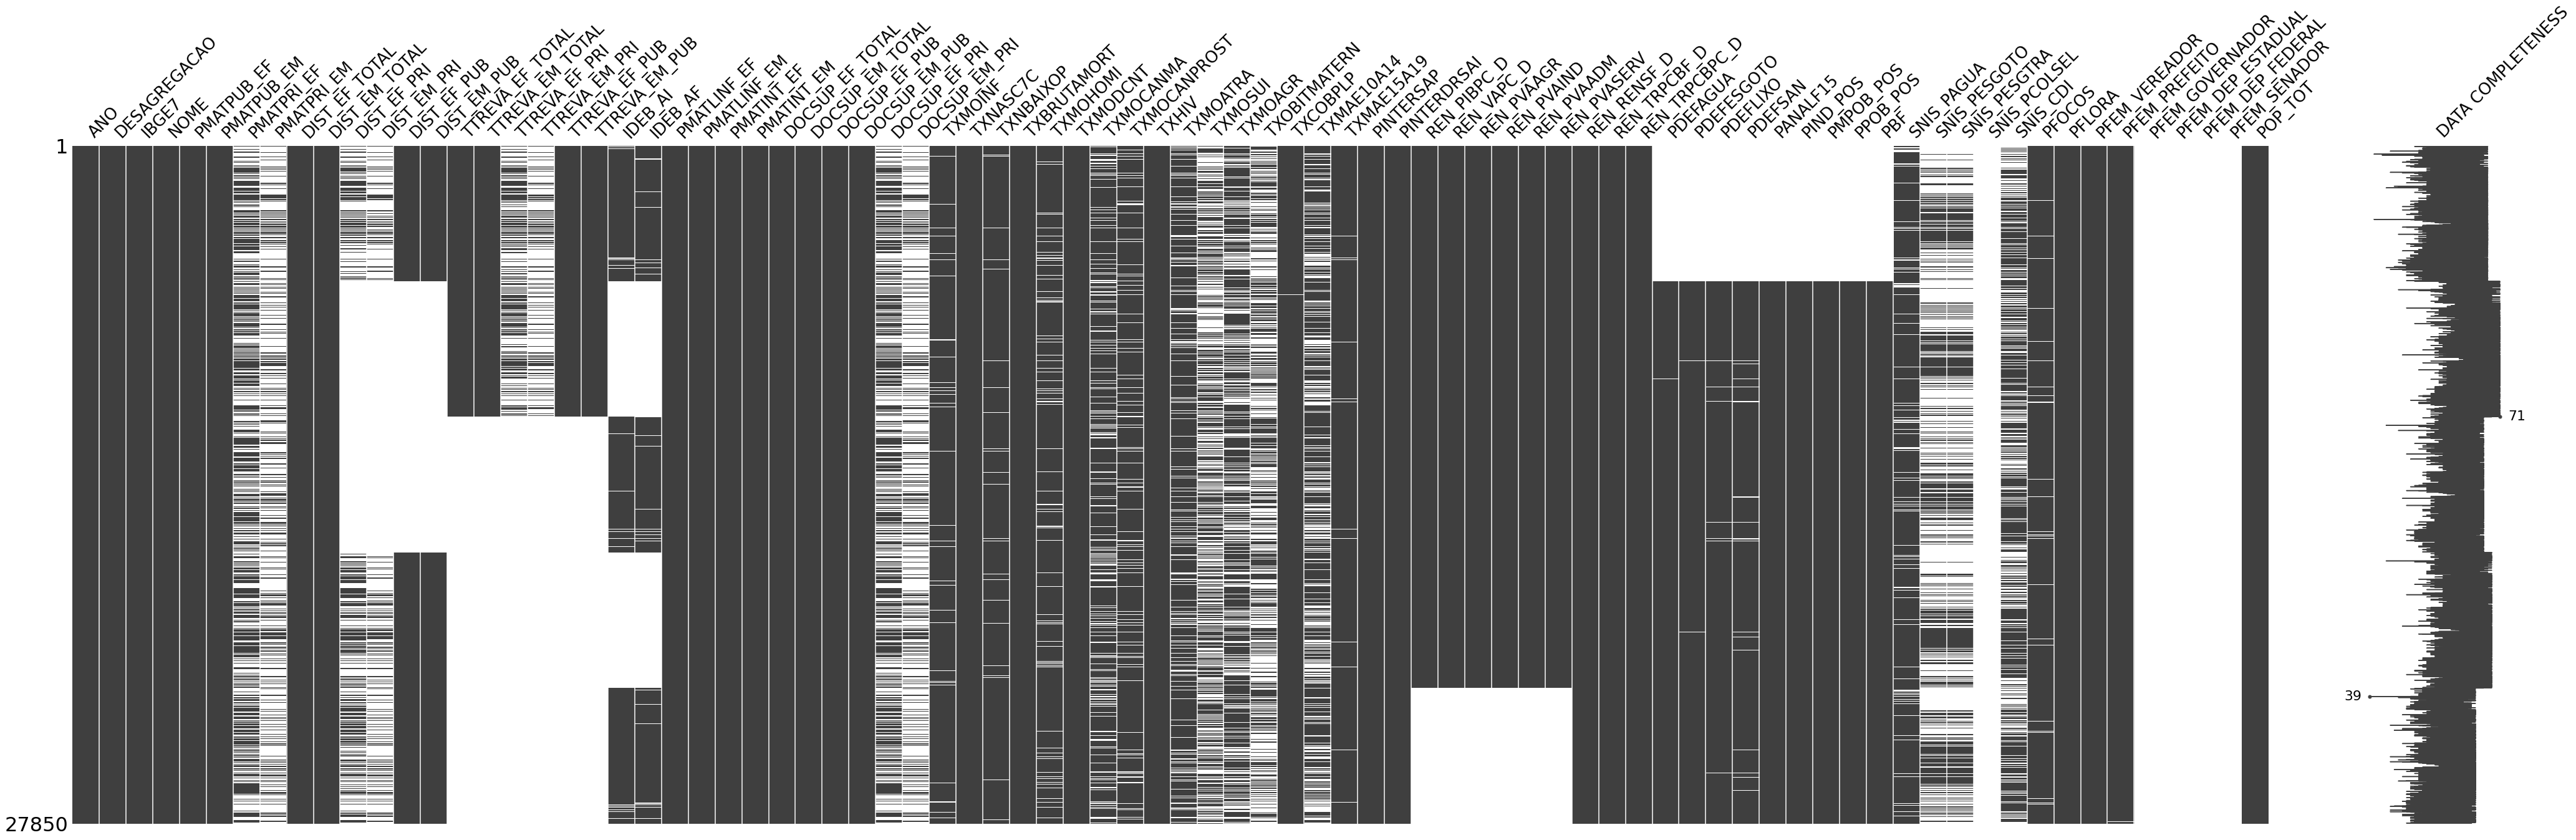

In [7]:
msno.matrix(df, labels=True, fontsize=26, figsize=(70, 20))

pandas_profiling.ProfileReport(df).to_notebook_iframe()

In [62]:
df_c = df.copy()

In [63]:
df_c['IBGE6'] = df_c['IBGE7'].astype(str).str[:6].astype('int64')

In [64]:
df_c = df_c[['ANO', 'IBGE6', 'IBGE7', 'NOME', 'PMATPUB_EF', 'PMATPUB_EM', 'DIST_EF_TOTAL', 'DIST_EM_TOTAL', 'DIST_EF_PUB', 'DIST_EM_PUB', 
             'TTREVA_EF_TOTAL', 'TTREVA_EM_TOTAL', 'TTREVA_EF_PUB', 'TTREVA_EM_PUB', 'PMATLINF_EF', 'PMATLINF_EM', 'PMATINT_EF', 'PMATINT_EM', 
             'DOCSUP_EF_TOTAL', 'DOCSUP_EM_TOTAL', 'DOCSUP_EF_PUB', 'DOCSUP_EM_PUB', 'TXMOINF', 'TXNASC7C', 'TXNBAIXOP', 'TXBRUTAMORT', 
             'TXMOHOMI', 'TXMODCNT', 'TXHIV', 'TXCOBPLP', 'TXMAE15A19', 'PINTERSAP', 'PINTERDRSAI', 'REN_PIBPC_D', 'REN_VAPC_D', 'REN_PVAAGR', 
             'REN_PVAIND', 'REN_PVAADM', 'REN_PVASERV', 'REN_RENSF_D', 'REN_TRPCBF_D', 'REN_TRPCBPC_D', 'PDEFAGUA', 'PDEFESGOTO', 'PDEFLIXO', 
             'PDEFSAN', 'PANALF15', 'PIND_POS', 'PMPOB_POS', 'PPOB_POS', 'PBF', 'PFOCOS', 'PFLORA', 'PFEM_VEREADOR', 'PFEM_PREFEITO', 'POP_TOT']]

<AxesSubplot:>

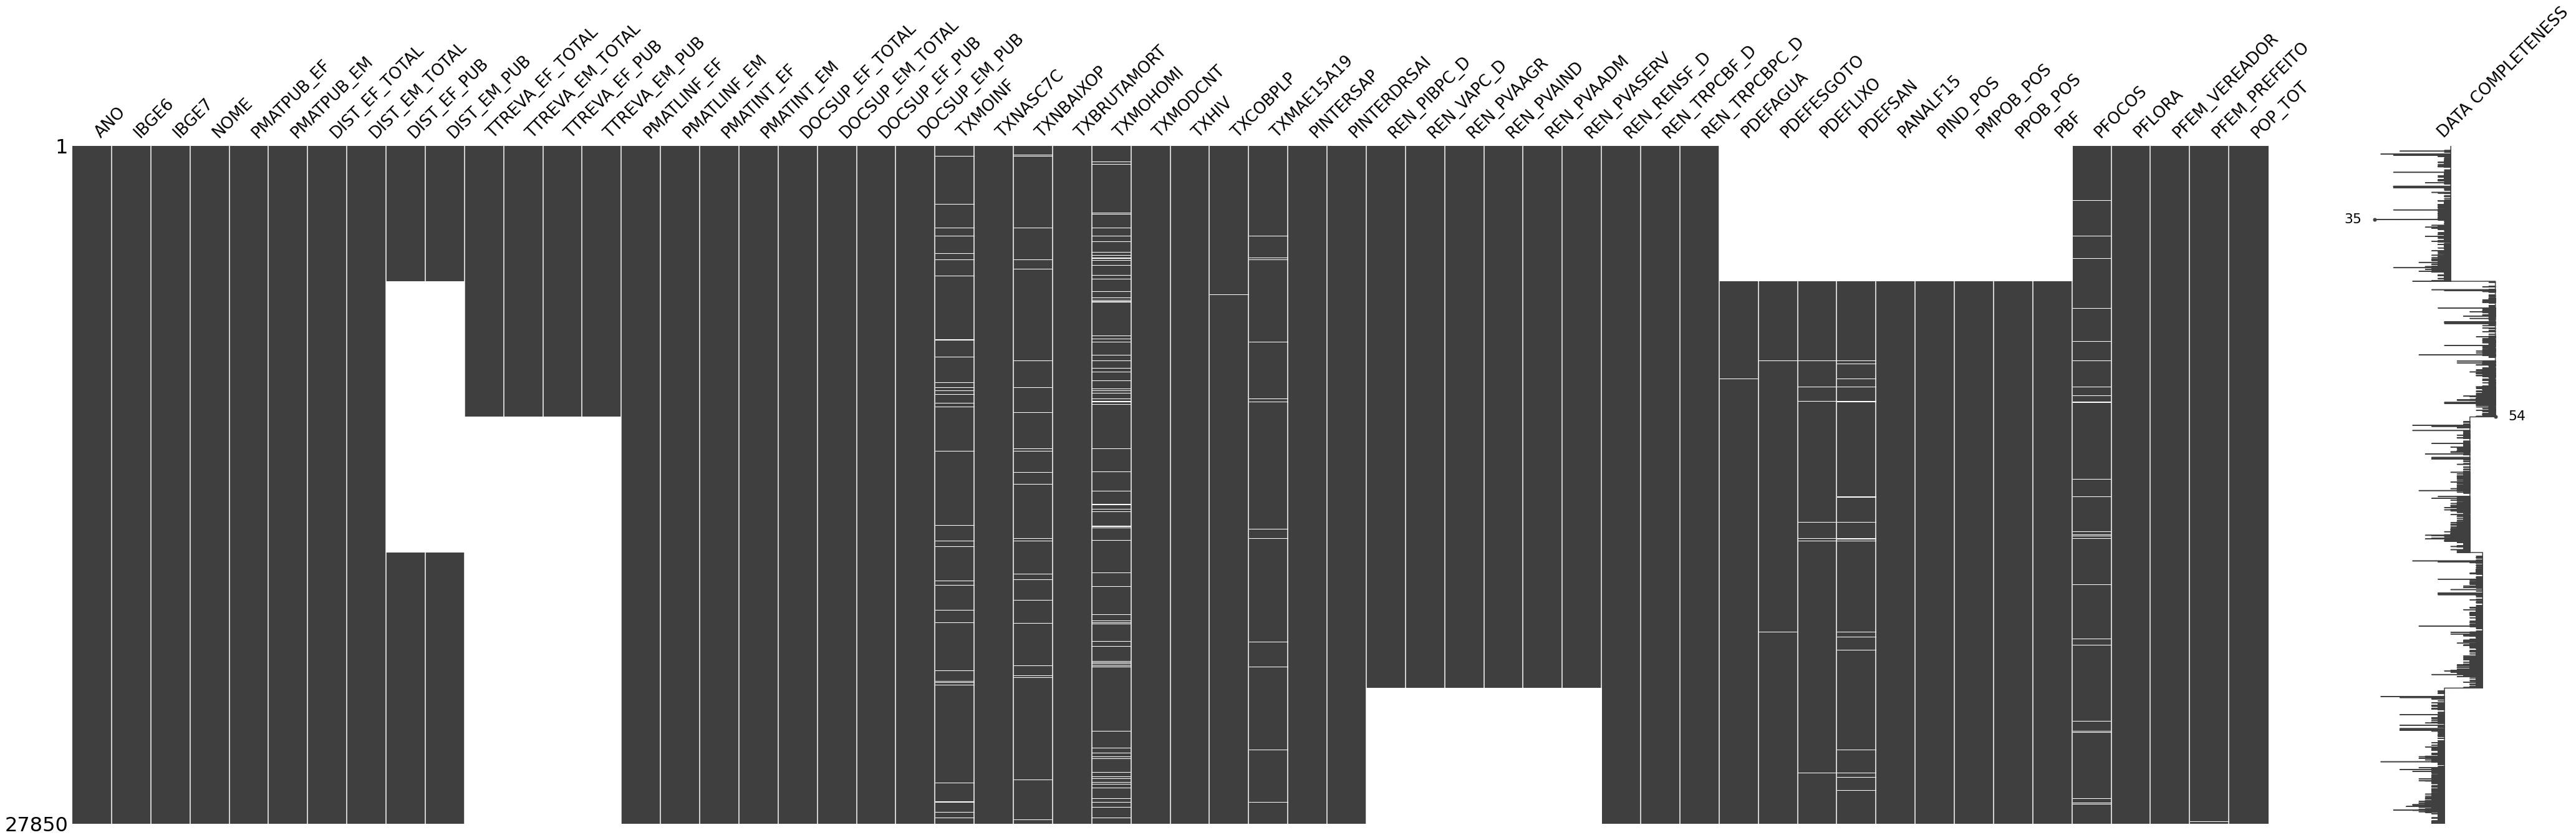

In [65]:
msno.matrix(df_c, labels=True, fontsize=26, figsize=(70, 20))

In [66]:
df_c.columns

Index(['ANO', 'IBGE6', 'IBGE7', 'NOME', 'PMATPUB_EF', 'PMATPUB_EM',
       'DIST_EF_TOTAL', 'DIST_EM_TOTAL', 'DIST_EF_PUB', 'DIST_EM_PUB',
       'TTREVA_EF_TOTAL', 'TTREVA_EM_TOTAL', 'TTREVA_EF_PUB', 'TTREVA_EM_PUB',
       'PMATLINF_EF', 'PMATLINF_EM', 'PMATINT_EF', 'PMATINT_EM',
       'DOCSUP_EF_TOTAL', 'DOCSUP_EM_TOTAL', 'DOCSUP_EF_PUB', 'DOCSUP_EM_PUB',
       'TXMOINF', 'TXNASC7C', 'TXNBAIXOP', 'TXBRUTAMORT', 'TXMOHOMI',
       'TXMODCNT', 'TXHIV', 'TXCOBPLP', 'TXMAE15A19', 'PINTERSAP',
       'PINTERDRSAI', 'REN_PIBPC_D', 'REN_VAPC_D', 'REN_PVAAGR', 'REN_PVAIND',
       'REN_PVAADM', 'REN_PVASERV', 'REN_RENSF_D', 'REN_TRPCBF_D',
       'REN_TRPCBPC_D', 'PDEFAGUA', 'PDEFESGOTO', 'PDEFLIXO', 'PDEFSAN',
       'PANALF15', 'PIND_POS', 'PMPOB_POS', 'PPOB_POS', 'PBF', 'PFOCOS',
       'PFLORA', 'PFEM_VEREADOR', 'PFEM_PREFEITO', 'POP_TOT'],
      dtype='object')

In [67]:
df_c.rename(columns={'PMATPUB_EF': 'PERCENTUAL_MAT_PUB_EF',
                    'PMATPUB_EM': 'PERCENTUAL_MAT_PUB_EM',
                    'DIST_EF_TOTAL': 'DISTORCAO_IDADE_SERIE_EF_TOTAL',
                    'DIST_EM_TOTAL': 'DISTORCAO_IDADE_SERIE_EM_TOTAL',
                    'DIST_EF_PUB': 'DISTORCAO_IDADE_SERIE_EF_PUB',
                    'DIST_EM_PUB': 'DISTORCAO_IDADE_SERIE_EM_PUB',
                    'TTREVA_EF_TOTAL': 'TAXA_EVASAO_EF_TOTAL',
                    'TTREVA_EM_TOTAL': 'TAXA_EVASAO_EM_TOTAL',
                    'TTREVA_EF_PUB': 'TAXA_EVASAO_EF_PUB',
                    'TTREVA_EM_PUB': 'TAXA_EVASAO_EM_PUB',
                    'PMATLINF_EF': 'PERCENTUAL_ALUNOS_ESCOLA_LABORATORIO_INFORMATICA_EF',
                    'PMATLINF_EM': 'PERCENTUAL_ALUNOS_ESCOLA_LABORATORIO_INFORMATICA_EM',
                    'PMATINT_EF': 'PERCENTUAL_ALUNOS_ESCOLA_INTERNET_EF',
                    'PMATINT_EM': 'PERCENTUAL_ALUNOS_ESCOLA_INTERNET_EM',
                    'DOCSUP_EF_TOTAL': 'PERCENTUAL_DOCENTES_FORMACAO_ADEQUADA_EF_TOTAL',
                    'DOCSUP_EM_TOTAL': 'PERCENTUAL_DOCENTES_FORMACAO_ADEQUADA_EM_TOTAL',
                    'DOCSUP_EF_PUB': 'PERCENTUAL_DOCENTES_FORMACAO_ADEQUADA_EF_PUB',
                    'DOCSUP_EM_PUB': 'PERCENTUAL_DOCENTES_FORMACAO_ADEQUADA_EM_PUB',
                    'TXMOINF': 'TAXA_MORTALIDADE_INFANTIL',
                    'TXNASC7C': 'PERCENTUAL_NASCIDOS_VIVOS_>7_CONSULTAS_PRENATAL',
                    'TXNBAIXOP': 'PERCENTUAL_NASCIDOS_VIVOS_BAIXO_PESO',
                    'TXBRUTAMORT': 'TAXA_BRUTA_MORTALIDADE',
                    'TXMOHOMI': 'TAXA_MORTALIDADE_HOMICIDIOS',
                    'TXMODCNT': 'TAXA_MORTALIDADE_DOENCAS_NAO_TRANSMISSIVEIS',
                    'TXHIV': 'TAXA_INCIDENCIA_HIV',
                    'TXCOBPLP': 'PERCENTUAL_PESSOAS_PLANO_SAUDE_SUPLEMENTAR',
                    'TXMAE15A19': 'PERCENTUAL_ADOLESCENTES_15_A_17_FILHOS',
                    'PINTERSAP': 'PERCENTUAL_INTERNACOES_SENSIVEIS_ATENCAO_PRIMARIA',
                    'PINTERDRSAI': 'PERCENTUAL_INTERNACOES_DOENCAS_SANEAMENTO_INADEQUADO',
                    'REN_PIBPC_D': 'PIB_PER_CAPITA',
                    'REN_VAPC_D': 'VALOR_ADICIONADO_PER_CAPITA',
                    'REN_PVAAGR': 'PARTICIPACAO_AGROPECUARIA_VALOR_ADICIONADO',
                    'REN_PVAIND': 'PARTICIPACAO_INDUSTRIA_VALOR_ADICIONADO',
                    'REN_PVAADM': 'PARTICIPACAO_ADMINISTRACAO_VALOR_ADICIONADO',
                    'REN_PVASERV': 'PARTICIPACAO_SERVICOS_VALOR_ADICIONADO',
                    'REN_RENSF_D': 'RENDIMENTO_MEDIO_SETOR_FORMAL',
                    'REN_TRPCBF_D': 'TRANSFERENCIA_PER_CAPITA_BOLSA_FAMILIA',
                    'REN_TRPCBPC_D': 'TRANSFERENCIA_PER_CAPITA_BENEFICIO_PRESTACAO_CONTINUA',
                    'PDEFAGUA': 'PERCENTUAL_INSCRITOS_CAD_UNICO_SEM_ABASTECIMENTO_AGUA',
                    'PDEFESGOTO': 'PERCENTUAL_INSCRITOS_CAD_UNICO_SEM_ESGOTAMENTO_SANITARIO',
                    'PDEFLIXO': 'PERCENTUAL_INSCRITOS_CAD_UNICO_SEM_COLETA_LIXO',
                    'PDEFSAN': 'PERCENTUAL_INSCRITOS_CAD_UNICO_SEM_ABASTECIMENTO_AGUA_ESGOTAMENTO_SANITARIO_COLETA_LIXO',
                    'PANALF15': 'PERCENTUAL_ANALFABETOS_>15_CADASTRO_UNICO',
                    'PIND_POS': 'PERCENTUAL_EXTREMAMENTE_POBRE_POS_BOLSA_FAMILIA',
                    'PMPOB_POS': 'PERCENTUAL_POBRE_POS_BOLSA_FAMILIA',
                    'PPOB_POS': 'PERCENTUAL_VUNERAVEL_POBREZA_POS_BOLSA_FAMILIA',
                    'PBF': 'PERCENTUAL_PESSOAS_RECEBEM_BOLSA_FAMILIA',
                    'PFOCOS': 'CONCENTRACAO_FOCOS_CALOR',
                    'PFLORA': 'PERCENTUAL_COBERTURA_VEGETAL',
                    'PFEM_VEREADOR': 'PERCENTUAL_VEREADORAS_MULHERES',
                    'PFEM_PREFEITO': 'PERCENTUAL_PREFEITAS_MULHERES',
                    'POP_TOT': 'POPULACAO_TOTAL'}, inplace=True)

<AxesSubplot:>

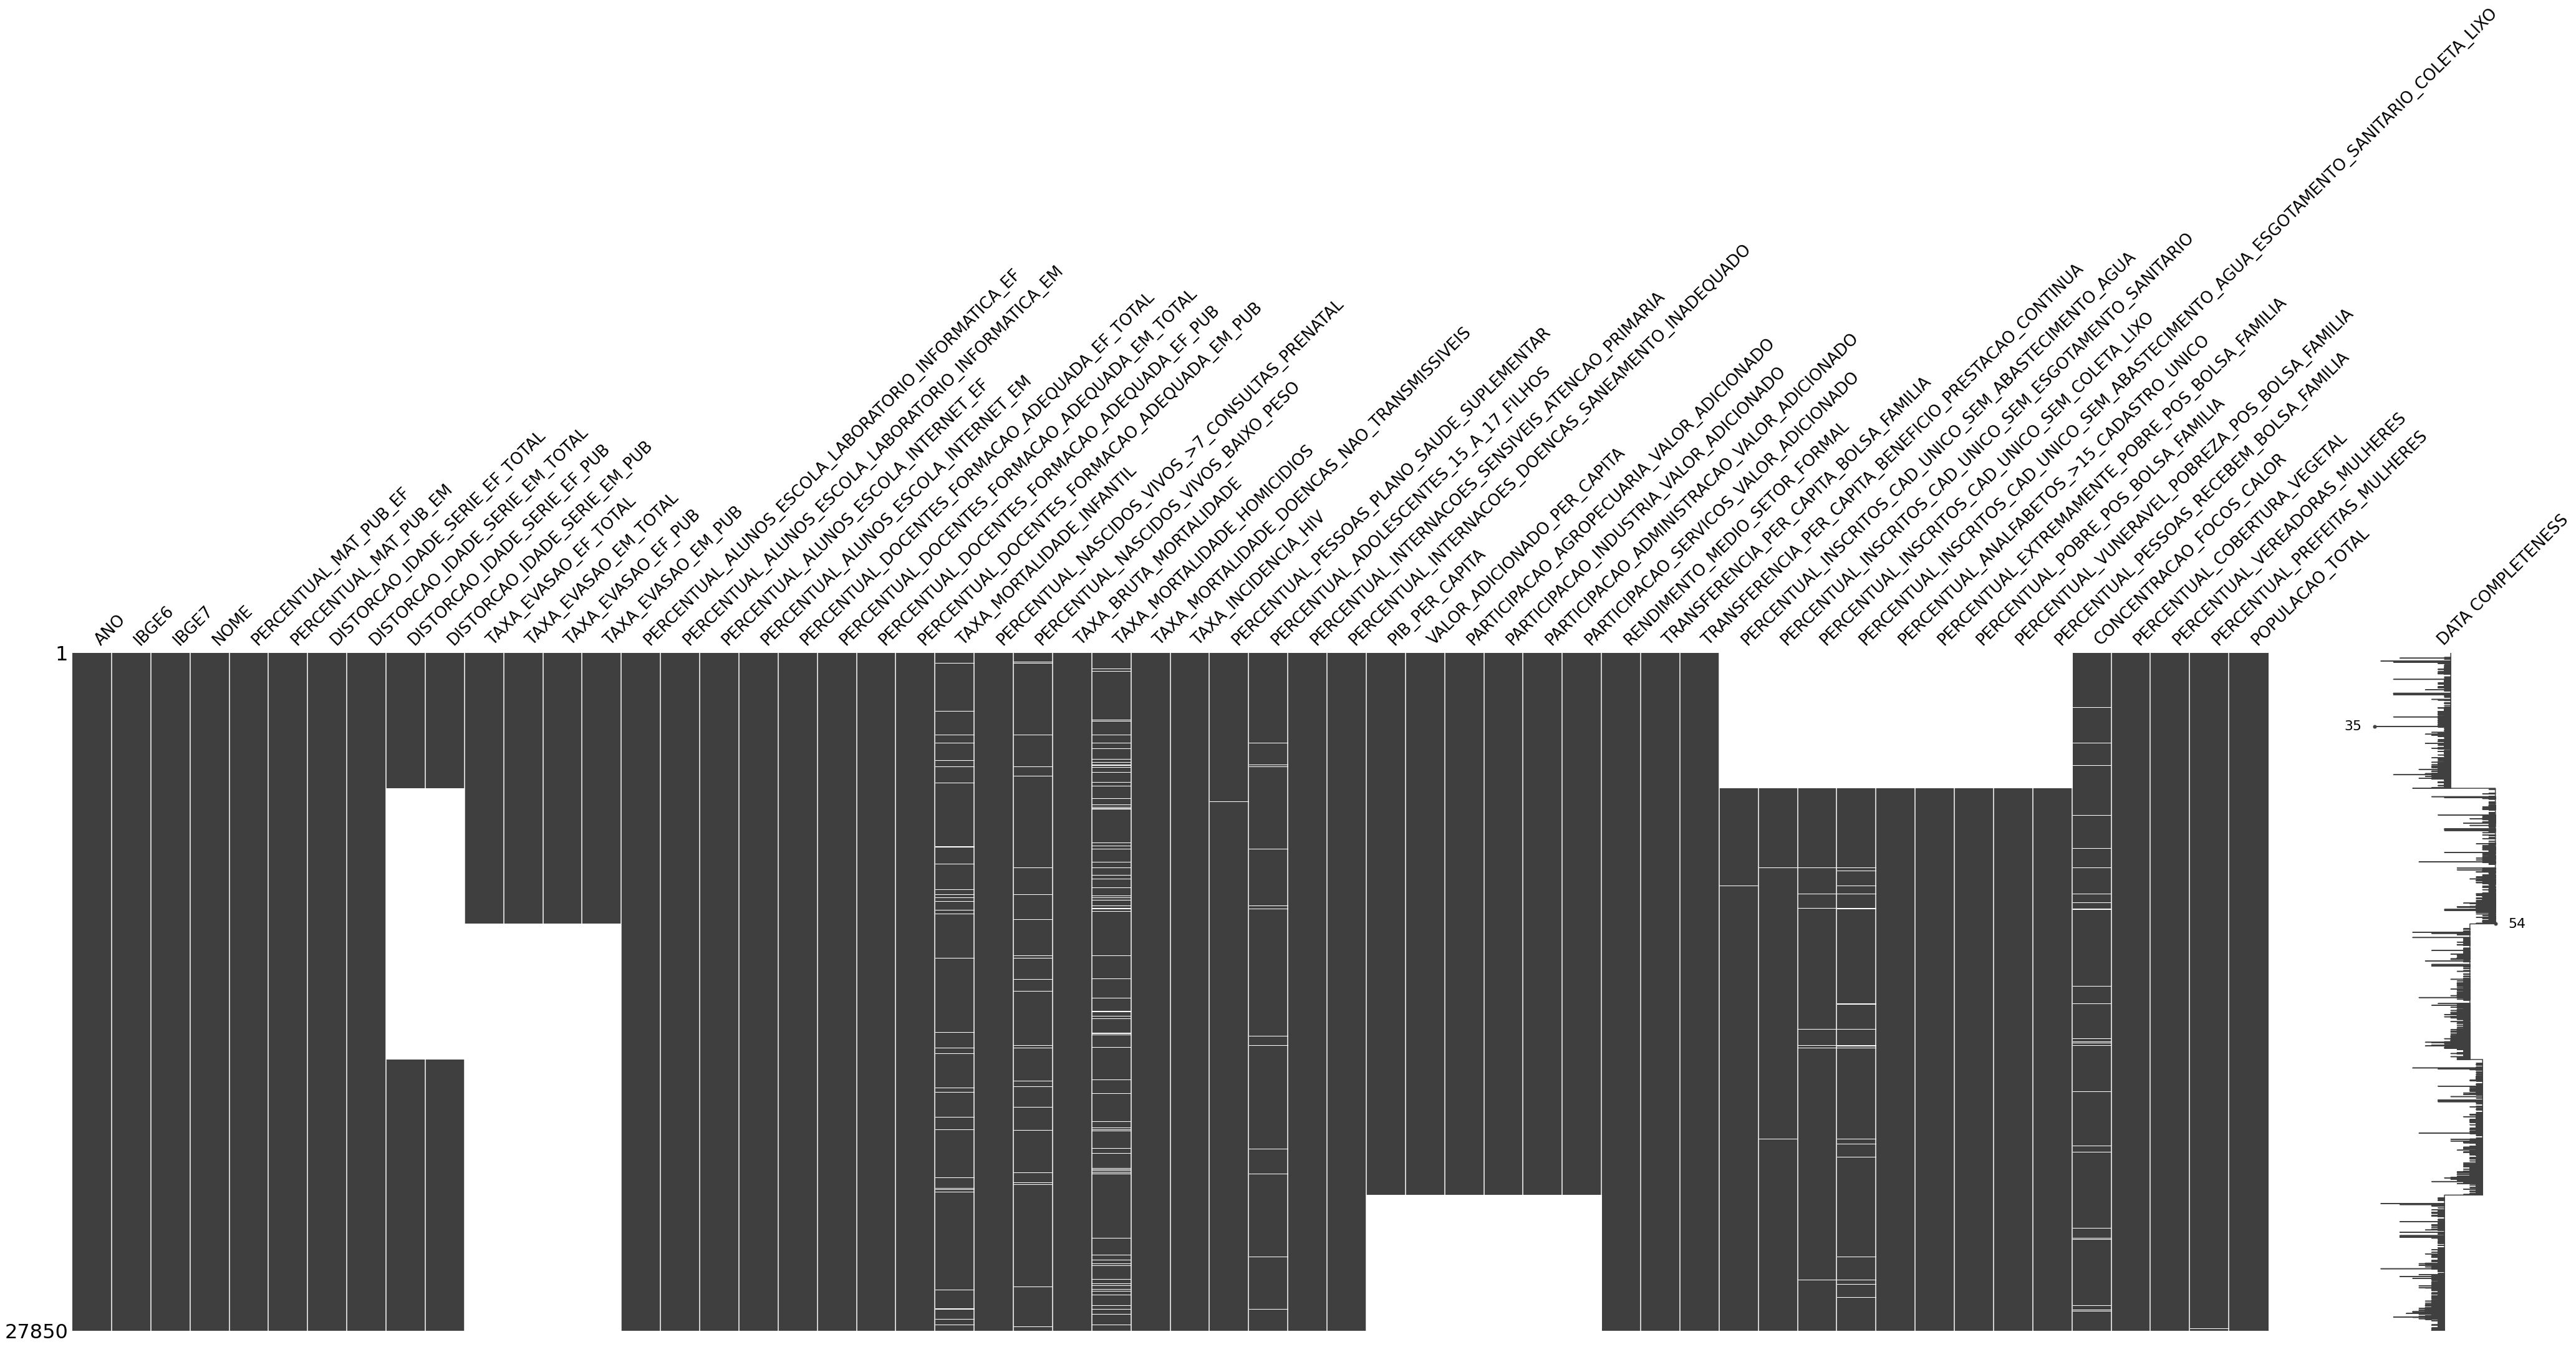

In [68]:
msno.matrix(df_c, labels=True, fontsize=26, figsize=(70, 20))

In [69]:
df_c.head()

,ANO,IBGE6,IBGE7,NOME,PERCENTUAL_MAT_PUB_EF,PERCENTUAL_MAT_PUB_EM,DISTORCAO_IDADE_SERIE_EF_TOTAL,DISTORCAO_IDADE_SERIE_EM_TOTAL,DISTORCAO_IDADE_SERIE_EF_PUB,DISTORCAO_IDADE_SERIE_EM_PUB,TAXA_EVASAO_EF_TOTAL,TAXA_EVASAO_EM_TOTAL,TAXA_EVASAO_EF_PUB,TAXA_EVASAO_EM_PUB,PERCENTUAL_ALUNOS_ESCOLA_LABORATORIO_INFORMATICA_EF,PERCENTUAL_ALUNOS_ESCOLA_LABORATORIO_INFORMATICA_EM,PERCENTUAL_ALUNOS_ESCOLA_INTERNET_EF,PERCENTUAL_ALUNOS_ESCOLA_INTERNET_EM,PERCENTUAL_DOCENTES_FORMACAO_ADEQUADA_EF_TOTAL,PERCENTUAL_DOCENTES_FORMACAO_ADEQUADA_EM_TOTAL,PERCENTUAL_DOCENTES_FORMACAO_ADEQUADA_EF_PUB,PERCENTUAL_DOCENTES_FORMACAO_ADEQUADA_EM_PUB,TAXA_MORTALIDADE_INFANTIL,PERCENTUAL_NASCIDOS_VIVOS_>7_CONSULTAS_PRENATAL,PERCENTUAL_NASCIDOS_VIVOS_BAIXO_PESO,TAXA_BRUTA_MORTALIDADE,TAXA_MORTALIDADE_HOMICIDIOS,TAXA_MORTALIDADE_DOENCAS_NAO_TRANSMISSIVEIS,TAXA_INCIDENCIA_HIV,PERCENTUAL_PESSOAS_PLANO_SAUDE_SUPLEMENTAR,PERCENTUAL_ADOLESCENTES_15_A_17_FILHOS,PERCENTUAL_INTERNACOES_SENSIVEIS_ATENCAO_PRIMARIA,PERCENTUAL_INTERNACOES_DOENCAS_SANEAMENTO_INADEQUADO,PIB_PER_CAPITA,VALOR_ADICIONADO_PER_CAPITA,PARTICIPACAO_AGROPECUARIA_VALOR_ADICIONADO,PARTICIPACAO_INDUSTRIA_VALOR_ADICIONADO,PARTICIPACAO_ADMINISTRACAO_VALOR_ADICIONADO,PARTICIPACAO_SERVICOS_VALOR_ADICIONADO,RENDIMENTO_MEDIO_SETOR_FORMAL,TRANSFERENCIA_PER_CAPITA_BOLSA_FAMILIA,TRANSFERENCIA_PER_CAPITA_BENEFICIO_PRESTACAO_CONTINUA,PERCENTUAL_INSCRITOS_CAD_UNICO_SEM_ABASTECIMENTO_AGUA,PERCENTUAL_INSCRITOS_CAD_UNICO_SEM_ESGOTAMENTO_SANITARIO,PERCENTUAL_INSCRITOS_CAD_UNICO_SEM_COLETA_LIXO,PERCENTUAL_INSCRITOS_CAD_UNICO_SEM_ABASTECIMENTO_AGUA_ESGOTAMENTO_SANITARIO_COLETA_LIXO,PERCENTUAL_ANALFABETOS_>15_CADASTRO_UNICO,PERCENTUAL_EXTREMAMENTE_POBRE_POS_BOLSA_FAMILIA,PERCENTUAL_POBRE_POS_BOLSA_FAMILIA,PERCENTUAL_VUNERAVEL_POBREZA_POS_BOLSA_FAMILIA,PERCENTUAL_PESSOAS_RECEBEM_BOLSA_FAMILIA,CONCENTRACAO_FOCOS_CALOR,PERCENTUAL_COBERTURA_VEGETAL,PERCENTUAL_VEREADORAS_MULHERES,PERCENTUAL_PREFEITAS_MULHERES,POPULACAO_TOTAL
0,2013,110001,1100015,Alta Floresta D&apos;Oeste,99.26,100.00,25.8,29.6,25.9,29.6,3.4,9.2,3.4,9.2,48.38,100.00,66.25,100.0,48.1,46.0,47.8,46.0,18.324607,64.397906,3.926702,4.353234,15.547264,198.227612,3.886816,12.546642,19.895288,40.164900,11.119403,11.10,10.29,34.16,6.27,37.08,22.50,921.94,111.29,118.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.51,66.02,20.00,0.0,25728
1,2013,110002,1100023,Ariquemes,91.12,94.80,24.5,27.1,26.3,28.5,3.0,9.1,3.2,9.5,89.38,92.90,89.27,100.0,57.7,57.9,59.9,57.6,11.487304,55.804111,7.799274,4.710227,62.210548,225.142936,0.987469,7.972825,21.342201,22.866741,2.586370,14.88,12.96,5.79,22.04,29.00,43.17,1168.11,77.75,152.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49,34.67,7.69,0.0,101269
2,2013,110003,1100031,Cabixi,100.00,100.00,18.1,18.7,18.1,18.7,1.5,6.9,1.5,6.9,83.74,89.69,100.00,100.0,68.4,64.9,68.4,64.9,13.513514,52.702703,6.756757,3.541186,0.000000,230.946882,0.000000,3.479600,13.513514,38.009050,7.641921,12.42,11.59,41.45,3.70,35.58,19.27,1035.36,108.25,74.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,32.01,11.11,0.0,6495
3,2013,110004,1100049,Cacoal,85.55,82.90,19.3,24.6,21.9,29.4,2.4,9.3,2.8,11.4,77.93,94.64,80.42,100.0,54.5,56.6,55.4,57.2,15.189873,68.776371,6.413502,4.414008,18.634336,270.197873,19.798982,8.680107,18.396624,31.855783,3.684514,13.97,12.12,11.02,10.99,31.01,46.97,1228.34,77.67,130.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,37.07,8.33,0.0,85863
4,2013,110005,1100056,Cerejeiras,97.18,97.47,21.1,21.1,21.5,21.7,2.5,8.5,2.6,8.8,71.05,97.47,100.00,100.0,71.1,58.3,71.1,58.3,11.070111,58.302583,3.690037,5.598359,16.628790,277.146500,33.257580,3.486503,21.402214,39.698492,15.279188,16.39,13.46,15.17,6.68,27.91,50.24,1147.02,81.75,147.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19,63.12,0.00,0.0,18041


In [70]:
df_c['NOME'] = df_c['NOME'].str.replace('&apos;', '')

In [71]:
df_c[df_c['NOME'].str.contains('Alta Floresta', regex=False)]['NOME'].value_counts(dropna=False).head(100)

Alta Floresta           5
Alta Floresta DOeste    5
Name: NOME, dtype: int64

In [72]:
df_c[df_c['DISTORCAO_IDADE_SERIE_EF_PUB'].isna()]['ANO'].value_counts(dropna=False)

2015    5570
2014    5570
2013       1
Name: ANO, dtype: int64

In [73]:
df_c[df_c['DISTORCAO_IDADE_SERIE_EM_PUB'].isna()]['ANO'].value_counts(dropna=False)

2015    5570
2014    5570
2013      13
2017      10
2016       9
Name: ANO, dtype: int64

In [74]:
df_c[df_c['TAXA_EVASAO_EF_TOTAL'].isna()]['ANO'].value_counts(dropna=False)

2015    5570
2017    5570
2016    5570
2013       2
Name: ANO, dtype: int64

In [75]:
df_c[df_c['PIB_PER_CAPITA'].isna()]['ANO'].value_counts(dropna=False)

2017    5570
2015       1
Name: ANO, dtype: int64

In [76]:
df_c[df_c['PERCENTUAL_INSCRITOS_CAD_UNICO_SEM_ABASTECIMENTO_AGUA'].isna()]['ANO'].value_counts(dropna=False)

2013    5570
2014       6
2015       3
2016       3
2017       2
Name: ANO, dtype: int64

In [77]:
df_c.dtypes

ANO                                                                                          int64
IBGE6                                                                                        int64
IBGE7                                                                                        int64
NOME                                                                                        object
PERCENTUAL_MAT_PUB_EF                                                                      float64
PERCENTUAL_MAT_PUB_EM                                                                      float64
DISTORCAO_IDADE_SERIE_EF_TOTAL                                                             float64
DISTORCAO_IDADE_SERIE_EM_TOTAL                                                             float64
DISTORCAO_IDADE_SERIE_EF_PUB                                                               float64
DISTORCAO_IDADE_SERIE_EM_PUB                                                               float64
TAXA_EVASA

In [80]:
df_c.to_csv('atlas_desenvolvimento_humano_por_municipio.csv', index=False, encoding='latin1')